<a href="https://colab.research.google.com/github/Lucas-F-Analysis/Lucas-F-Analysis/blob/main/Titanic_Machine_Learning_from_Disaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Report

After testing different models with the Titanic dataset to predict whether a passenger survives or not, we concluded that with the validation data the best models that worked were the Random Forest without grid search with an accuracy of 87.41% and later on with the train and test data with an accuracy of 86.03%.

But of all the models tested with the train and test data the best model to use is the Random Forest model applying a Grid Search, to find the best hyperparameters automatically. Achieving 87.70% with the training and evaluation datasets. Although with the validation data this model was one of the lowest accuracy giving an accuracy of 80.48 %.

Friday 04/10: After learning about the use of Mutual Information and applying it to this project, I find that there is another Random Forest model that with the validation data achieves an accuracy of 88.11%. Then I train it and test it with the x_train and y_train to achieve an accuracy of 87.15%.

# Titanic Project
# Predicting whether a passenger survives or not

The first thing to do is to import the data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Titanic (1)/Titanic-Dataset.csv')

# 2) Understanding the dataset

The second thing I am going to do is to look at the dataset, explore its minima, maxima, variances, averages, etc. I am also going to filter the dataset in excel to see if there are any variables that correlate with the ‘survived’ variable.

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# View null values by column
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Vemos diferentes gráficos a ver que nos dicen

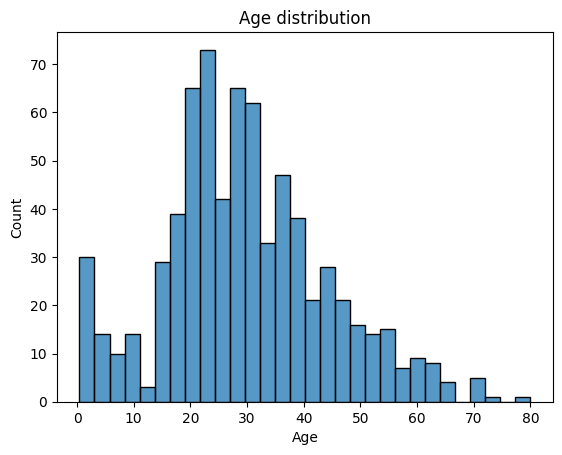

In [7]:
# Age distribution chart
sns.histplot(df['Age'].dropna(), kde=False, bins=30)
plt.title('Age distribution')
plt.show()

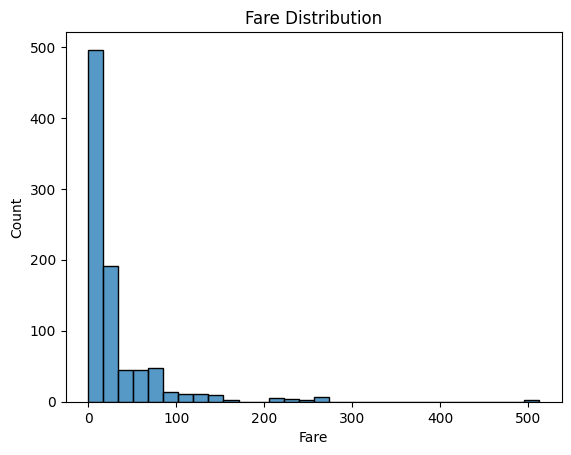

In [8]:
# Tariff distribution graph
sns.histplot(df['Fare'], kde=False, bins=30)
plt.title('Fare Distribution')
plt.show()

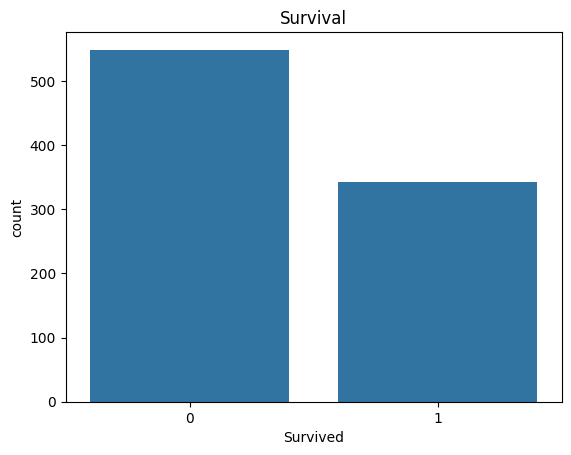

In [9]:
# Survival graph
sns.countplot(data=df, x='Survived')
plt.title('Survival')
plt.show()

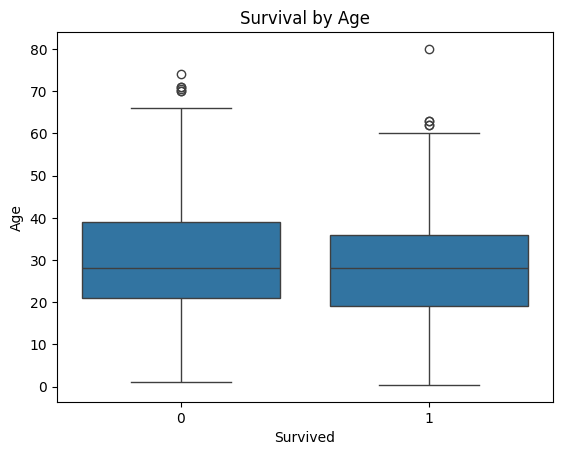

In [10]:
# Survival by age boxplot
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Survival by Age')
plt.show()

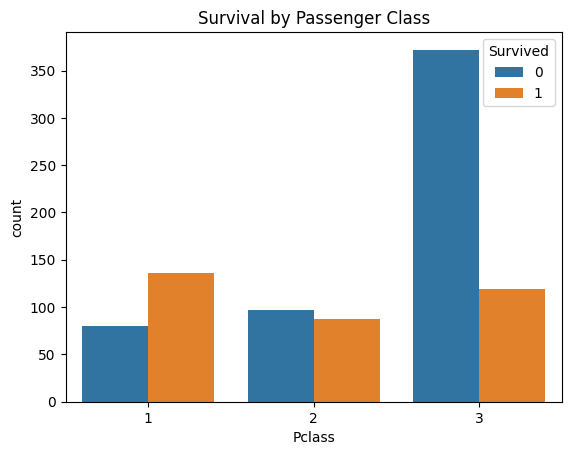

In [11]:
# Survival by class bar chart
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Survival by Passenger Class')
plt.show()

Vemos que porcentaje de hombres sobrevivió, y que porcentaje de mujeres sobrevivió. También por cantidades

In [12]:
# Showing the number of men and women who survived
survived_df = df[df['Survived'] == 1]
male_survived = survived_df[survived_df['Sex'] == 'male'].shape[0]
female_survived = survived_df[survived_df['Sex'] == 'female'].shape[0]
total_survived = male_survived + female_survived
# Calculate the percentage of male survivors
male_survived_percentage = (male_survived / total_survived) * 100
# Calculate the percentage of female survivors
female_survived_percentage = (female_survived / total_survived) * 100

print(f"There are {survived_df.shape[0]} survivors")
print(f"Percentage of men who survived: {male_survived_percentage:.2f}%")
print(f"Percentage of women who survived: {female_survived_percentage:.2f}%")

print(f"{male_survived} men survived among {df[df['Sex'] == 'male'].shape[0]} men and {female_survived} women among {df[df['Sex'] == 'female'].shape[0]} women")

There are 342 survivors
Percentage of men who survived: 31.87%
Percentage of women who survived: 68.13%
109 men survived among 577 men and 233 women among 314 women


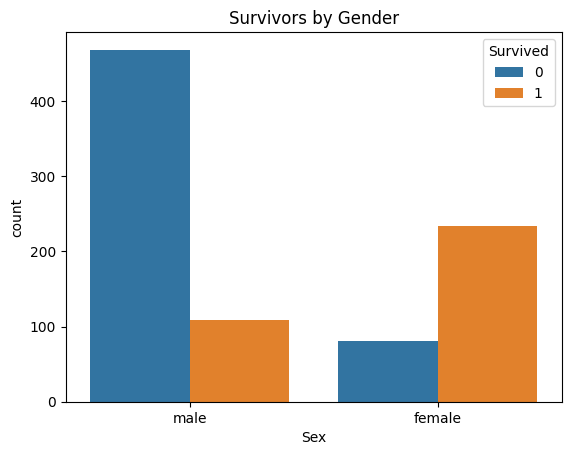

In [13]:
# Survivors by gender bar chart
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survivors by Gender')
plt.show()

With this data we can see that the data tells us that more females survived than males with 68.13% female survivors out of the total number of survivors, and 31.87% male survivors out of the total number of survivors. And 109 men out of 577 men and 233 women out of 314 women survived.

This means that women have a better than average chance of survival.

And therefore the ‘Sex’ column is an important column to consider.

# 3) Cleaning the data

Earlier we saw that we have null and missing values in the columns ‘Age’, ‘Cabin’ and ‘Embarked’.

Processing the ‘Embarked’ column

In [14]:
# We see how many ‘Embarked’ there are per value in the whole dataframe to find out what the trend is.
df['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [15]:
# Impute the values of the ‘Embarked’ column with the mode
embarked_imputer = SimpleImputer(strategy='most_frequent')

df['Embarked_1'] = embarked_imputer.fit_transform(df[['Embarked']]).ravel()

In [16]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [17]:
# See how many ‘Embarked’ there are per value in the whole dataframe
df['Embarked_1'].value_counts()

,count
Embarked_1,
S,646
C,168
Q,77


Editing column "Age"

In [18]:
# Let's see an overview of the column ‘Age’.
df['Age'].describe()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


In [19]:
# Average ‘Age’ per joint filter of ‘Pclass’ and ‘Sex’.
age_by_class_sex = df.groupby(['Pclass', 'Sex'])['Age'].mean()

print(age_by_class_sex)

Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: Age, dtype: float64


Next, what I am going to do is to replace the missing values in the ‘Age’ column with the average age but taking into account this double filter shown in the codeframe above (values filtered by class and gender), i.e. if there is a missing ‘Age’ data in the row that there is a ‘Pclass’ of 2 and it is male, this missing value is replaced by 30.74. And if for example there is a missing ‘Age’ value in the row that has a ‘Pclass’ of 3 and it is female, it is replaced by 21.75. And so on and so forth.

I think it is better to do this instead of applying an overall average of all ages, as that would lead to more variability in the ‘Age’ column, and would make it more out of touch with reality. Instead, applying averages with double filters I think makes it more accurate and closer to reality.

In [20]:
# Crear copia del dataframe para no afectar al dataframe original
# df_copy = df.copy()

In [21]:
age_means = df.groupby(['Pclass', 'Sex'])['Age'].mean()

# Function to replace missing values in ‘Age’ with the corresponding average.
def impute_age(row):
    if pd.isnull(row['Age']):
        return age_means[row['Pclass'], row['Sex']]
    else:
        return row['Age']

df['Age_1'] = df.apply(impute_age, axis=1)

# Check for missing values in ‘Age_1’.
print(df['Age_1'].isnull().sum())

0


In [22]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Before cleaning up the ‘Cabin’ column, let's recode the ‘Sex’ column.

In [23]:
# Convertir generos en 0 y 1
df['Sex_1'] = df['Sex'].map({'male': 1, 'female': 0})

Editing column ‘Cabin’.

We cannot impute the column ‘Cabin’ because we have too many missing values and too little data.

In [24]:
df["Cabin"].value_counts()

,count
Cabin,
B96 B98,4
G6,4
C23 C25 C27,4
C22 C26,3
F33,3
...,...
E34,1
C7,1
C54,1


We observe that there is a lot of variability in this column, i.e. many categories, with 147 unique values. We need to reduce this number.

If we look closely at the values, we have letters and numbers, i.e. we can categorise by letters and numbers, we have for example: C23 C25 C27, all belonging to C.

In this way we can reduce the amount of unique values in the column ‘Cabin’.

To do this, let's extract the first characters of these values, but from the unique values without repeating, without including the missing ones.

In [25]:
# Create a new DataFrame with column ‘Cabin_1’ containing the first character of ‘Cabin’.
df_cabin = df[['Cabin']].copy()
df_cabin['Cabin_1'] = df_cabin['Cabin'].str[0]

# Remove null values in ‘Cabin_1’.
df_cabin.dropna(subset=['Cabin_1'], inplace=True)

# Remove duplicate values in ‘Cabin_1’.
df_cabin.drop_duplicates(subset=['Cabin_1'], inplace=True)
df_cabin.drop(columns=['Cabin'], inplace=True)

# Display the dataframe
print(df_cabin)

    Cabin_1
1         C
6         E
10        G
21        D
23        A
31        B
66        F
339       T


In [26]:
# Create new column ‘Cabin_1’ by taking the first character of each value in ‘Cabin’
df['Cabin_1'] = df['Cabin'].str[0]

# Create an imputator to replace null values with ‘M’
imputer = SimpleImputer(strategy='constant', fill_value='M')

# Impute the values in ‘Cabin_1’ and flatten the result to 1D array
df['Cabin_1'] = imputer.fit_transform(df[['Cabin_1']]).flatten()

Check:

In [27]:
df['Cabin_1'].value_counts()

,count
Cabin_1,
M,687
C,59
B,47
D,33
E,32
A,15
F,13
G,4
T,1


The only problem we found is that there is only one record with cabin ‘T’.

It would be interesting to analyse the relatives, siblings, parents, children and spouses of the dataframe. Since this influences survival, it is more difficult to try to save a large family than a small family, at the same time that saving a small family is more difficult than saving a single person, it also influences the fact that women and children are prioritised, therefore the chances of survival of a man with a family are probably lower. These circumstances make knowing this important in determining whether or not he survives. Knowing whether the passenger came with a family or not is therefore important.

Editing columns ‘SibSp’ and ‘Parch’.

Let's create a column called ‘Family’. We create this column to determine if the passenger came with family and how many.



In [28]:
# Create column ‘Family’ which adds column ‘SibSp’ and ‘Parch’ plus 1.
df['Family'] = df['SibSp'] + df['Parch'] + 1

We create an "IsAlone" column to know if the passenger is alone or not

In [29]:
# Create column ‘IsAlone’ to know if the passenger is alone or not, where 1 is ‘yes, he came alone’ and 0 is ‘no, he didn't come alone’.
df['IsAlone'] = df['Family'].apply(lambda x: 1 if x == 1 else 0)

Now we move on to deal with the ‘Name’ column, and we are going to create a title column from the ‘Name’ variable.

Now we are going to extract characteristics from the variable ‘Name’. If we look closely we have passengers whose names contain ‘Mr.’, ‘Mrs.’, ‘Miss’, etc. We are going to extract these characteristics

This is important to know as it determines the status of each passenger, someone of royalty is probably more likely to survive than a simple passenger because of the priority they receive. Or going back to the reasoning of male females, someone with ‘Miss’ in their name is probably more likely to live, as they are female. They also determine the profession of each passenger

In [30]:
# Extract the title from the ‘Name’ column and create a new ‘Title’ column.
df['Title'] = df['Name'].str.extract(r'([A-Za-z]+)\.')

df[['Name', 'Title']]

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr
...,...,...
886,"Montvila, Rev. Juozas",Rev
887,"Graham, Miss. Margaret Edith",Miss
888,"Johnston, Miss. Catherine Helen ""Carrie""",Miss
889,"Behr, Mr. Karl Howell",Mr


In [31]:
df['Title'].value_counts()

,count
Title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Mlle,2
Major,2
Col,2


Mr: Title for adult men. It is the equivalent of ‘Señor’ in Spanish. Most of the men on the Titanic have this title.

Miss: Refers to young or unmarried women. Equivalent to ‘Señorita’ in Spanish.

Mrs: Title used for married women. Equivalent to ‘Señora’ in Spanish.

Master: Refers to boys or young men, usually minors.

Dr: Refers to a doctor or someone with an advanced academic degree.

Rev: Abbreviation of ‘Reverend’, i.e. a reverend or clergyman.

Mlle: Abbreviation of ‘Mademoiselle’, French title for ‘Mademoiselle’ (equivalent to Miss).

Major: Military title referring to a ‘Major’ in the army.

Col: Abbreviation of ‘Colonel’, also a military title.

Countess: Refers to a ‘Countess’, a female title of nobility.

Capt: Abbreviation of ‘Captain’, a military or maritime title.

Ms: Modern title for women that does not indicate marital status. Equivalent to ‘Mrs.’ or ‘Miss’ in English.

Sir: Honorary title given to knights, usually of British nobility or persons of special distinction.

Lady: Female title of nobility, usually the counterpart of ‘Sir’.

Mme: Abbreviation of ‘Madame’, French title equivalent to ‘Madame’ (Mrs.).

Don: Honorific title used in some countries, such as Spain, for men of high status or respect.

Jonkheer: Dutch title of nobility, usually translated as ‘gentlemanly man’ or ‘gentleman’.

We still have a lot of variability, besides the fact that some values mean the same thing, we have many categories, so we can recategorise some values. For example: Ms is the same as Miss, and Mme is the same as Mrs, and Mlle is the same as Miss. Then Don, Rev, Dr, Major, Lady, Sir, Col, Capt, Countess and Jonkheer can be recategorised as ‘Royalty’.

In [32]:
# Replace ‘Ms’ and ‘Mlle’ with ‘Miss’. Replace ‘Mme’ with ‘Mrs’, and replace ‘Don’, ‘Rev’, ‘Dr’, ‘Major’, ‘Lady’, ‘Sir’, ‘Col’, ‘Capt’, ‘Countess’ and ‘Jonkheer’ with ‘Royalty’.
df['Title_1'] = df['Title'].replace({
    'Ms': 'Miss',
    'Mlle': 'Miss',
    'Mme': 'Mrs',
    'Don': 'Royalty',
    'Rev': 'Royalty',
    'Dr': 'Royalty',
    'Major': 'Royalty',
    'Lady': 'Royalty',
    'Sir': 'Royalty',
    'Col': 'Royalty',
    'Capt': 'Royalty',
    'Countess': 'Royalty',
    'Jonkheer': 'Royalty'
})

In [33]:
df['Title_1'].value_counts()

,count
Title_1,
Mr,517
Miss,185
Mrs,126
Master,40
Royalty,23


Editing variable ‘Ticket’

In [34]:
df['Ticket'].value_counts()

,count
Ticket,
347082,7
CA. 2343,7
1601,7
3101295,6
CA 2144,6
...,...
9234,1
19988,1
2693,1


In [35]:
df['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [36]:
len(df['Ticket'].unique())

681

In the variable ‘Ticket’ we can observe a great variability, with letters and numbers in its values, many values contain bars and dots.

Basically we have some patterns in these values

We have patterns like:

number

< letter > number

<letter+.+/> number

What we're going to do is clean up the dot and the slash, so that we only have two formats.
The one for number and the one for <letter > number.

Considering that we have 681 unique values, we are going to separate the values that are only numerical from the others.

What this function does is to analyse each value of the column ‘Ticket’, and if the value is completely numeric, that is to say, that contains only numbers, it is transformed into ‘xx’, and if the value is not purely numeric, the slash or the dot is removed.

In [37]:
# Function to process each ticket
def process_ticket(ticket):
    if ticket.isdigit():  # If the value is purely numeric
        return 'xx'
    else:
        # If the value is not numerical, we remove bars and dots.
        return ticket.replace('/', '').replace('.', '')

# We apply the function to create the new column ‘Ticket_Inter’.
df['Ticket_Inter'] = df['Ticket'].apply(process_ticket)


In [38]:
df['Ticket_Inter'].value_counts()

,count
Ticket_Inter,
xx,661
CA 2343,7
CA 2144,6
SOC 14879,5
PC 17757,4
...,...
FCC 13528,1
SOTONOQ 3101311,1
A5 3540,1


We can see that we reduce the variability from 681 to 168.

We still have a lot of variability though. So, we are going to do something similar to what we did before with ‘Cabin’, but in this case we are going to extract the first characters but before finding a space, i.e. if we have a value like ‘A5 3540’ we extract ‘A5’, if we have ‘SOTONOQ 392076’ we extract only ‘SOTONOQ’.

We can see that many of the values we have contain two letters and then the numbers, so we will use this information.

In [39]:
# Create the column ‘Ticket_Inter2’ with the first characters of ‘Ticket_Inter’ before a space.
df['Ticket_Inter2'] = df['Ticket_Inter'].str.split().str[0]

In [40]:
# Modify the values ‘SCPARIS’ to ‘SCParis’.
df['Ticket_Inter2'] = df['Ticket_Inter2'].replace('SCPARIS', 'SCParis')

In [41]:
df['Ticket_Inter2'].value_counts()

,count
Ticket_Inter2,
xx,661
PC,60
CA,41
A5,21
SOTONOQ,15
STONO,12
SCParis,11
WC,10
A4,7


In [42]:
len(df['Ticket_Inter2'].unique())

30

Now we lower the variability to 30

It is still high, so we will convert the values that appear 1 time into a category called ‘Single’, we know this by observing the value_counts() applied above.

In [43]:
df['Ticket_1'] = df['Ticket_Inter2'].replace({
    'CASOTON': 'Single',
    'SCA4': 'Single',
    'SOP': 'Single',
    'Fa': 'Single',
    'SP': 'Single',
    'SC': 'Single',
    'SCOW': 'Single',
    'AS': 'Single',
    'FC': 'Single',
})

In [44]:
df['Ticket_1'].value_counts()

,count
Ticket_1,
xx,661
PC,60
CA,41
A5,21
SOTONOQ,15
STONO,12
SCParis,11
WC,10
Single,9


In [45]:
len(df["Ticket_1"].unique())

22

In [46]:
# Access the values of ‘Ticket_1’ that contain ‘Single’.
df[df['Ticket_1'] == 'Single']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Age_1,Sex_1,Cabin_1,Family,IsAlone,Title,Title_1,Ticket_Inter,Ticket_Inter2,Ticket_1
45,46,0,3,"Rogers, Mr. William John",male,NaN,0,0,S.C./A.4. 23567,8.0500,...,26.507589,1,M,1,1,Mr,Mr,SCA4 23567,SCA4,Single
67,68,0,3,"Crease, Mr. Ernest James",male,19.0,0,0,S.P. 3464,8.1583,...,19.000000,1,M,1,1,Mr,Mr,SP 3464,SP,Single
150,151,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.5250,...,51.000000,1,M,1,1,Rev,Royalty,SOP 1166,SOP,Single
154,155,0,3,"Olsen, Mr. Ole Martin",male,NaN,0,0,Fa 265302,7.3125,...,26.507589,1,M,1,1,Mr,Mr,Fa 265302,Fa,Single
239,240,0,2,"Hunt, Mr. George Henry",male,33.0,0,0,SCO/W 1585,12.2750,...,33.000000,1,M,1,1,Mr,Mr,SCOW 1585,SCOW,Single
389,390,1,2,"Lehmann, Miss. Bertha",female,17.0,0,0,SC 1748,12.0000,...,17.000000,0,M,1,1,Miss,Miss,SC 1748,SC,Single
464,465,0,3,"Maisner, Mr. Simon",male,NaN,0,0,A/S 2816,8.0500,...,26.507589,1,M,1,1,Mr,Mr,AS 2816,AS,Single
671,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,...,31.000000,1,B,2,0,Mr,Mr,FC 12750,FC,Single
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,...,28.000000,1,M,1,1,Mr,Mr,CASOTON 34068,CASOTON,Single


And in this way we bring 681 unique values of the column ‘Ticket’ to 22 unique values, reducing its variability significantly.

Treating the variable ‘Age_1’

What I do here is to group passengers by age, applying a category to them, for example, if they are between 0 and 5 years old they are categorised as a ‘baby’, if they are between 6 and 10 years old they are categorised as a child, if they are between ‘18 and 46 they are categorised as an “adult”. All this applied to a new column called ‘Age_Category’ created from the previously created ‘Age_1’ column.

In [47]:
def categorize_age(age):
    if pd.isna(age):
        return 'unknown'  # Para manejar valores NaN
    elif 0 <= age <= 5:
        return 'baby'
    elif 6 <= age <= 10:
        return 'kid'
    elif 11 <= age <= 14:
        return 'teen'
    elif 15 <= age <= 17:
        return 'big teen'
    elif 18 <= age <= 46:
        return 'adult'
    elif 41 <= age <= 55:
        return 'older adult'
    elif 56 <= age <= 62:
        return 'elderly adult'
    elif 63 <= age <= 80:
        return 'old'
    else:
        return 'unknown'

In [48]:
df['Age_1'].value_counts()

,count
Age_1,
26.507589,94
21.750000,42
24.000000,30
22.000000,27
18.000000,26
...,...
14.500000,1
70.500000,1
12.000000,1


In [49]:
df['Age_Category'] = df['Age_1'].apply(categorize_age)

In [50]:
# We coded numerical values for these different age groups
age_mapping = {
    'baby': 0,
    'kid': 1,
    'teen': 2,
    'big teen': 3,
    'adult': 4,
    'older adult': 5,
    'elderly adult': 6,
    'old': 7,
    'unknown': 8  # To handle values that do not fit the categories
}

In [51]:
# Create a new column to apply this coding
df['Age_Category_1'] = df['Age_Category'].map(age_mapping)

In [52]:
df['Age_Category_1']

,Age_Category_1
0,4
1,4
2,4
3,4
4,4
...,...
886,4
887,4
888,4
889,4


# Using OneHotEncoder

Now we will use OneHotEncoder to distribute the weights of the values of the variables we created.

For example: with the column ‘Title_1’ or ‘Tittle’ we have Mr., Mrs., Miss, Master and Royalty. Instead of just replacing these categorical values with numbers, we are going to create new columns for each of these values, thus having one column for Mr., one for Mrs., one for Miss, one for Master, and one for Royalty. So that if the passenger is Mr., the Mr. column will have a value of 1, and the rest of the columns will have a value of 0.

We will do this for the columns ‘Title_1’, ‘Embarked_1’, ‘Cabin_1’, ‘Ticket_1’, ‘Sex_1’, ‘Age_Category_1’, and ‘Age_Category_1’.

In [53]:
# Create the OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', drop=None)

# Select the columns to encode
columnas_a_encode = df[['Title_1', 'Embarked_1', 'Cabin_1', "Ticket_1", "Sex_1", "Age_Category_1"]]

# Apply the OneHotEncoder
df_encode = encoder.fit_transform(columnas_a_encode)

# Convert to DataFrame with the names of the new columns
df_encode = df_encode.toarray()
encoded_df = pd.DataFrame(df_encode, columns=encoder.get_feature_names_out(['Title_1', 'Embarked_1', 'Cabin_1', 'Ticket_1', 'Sex_1', 'Age_Category_1']))

# Add the encoded columns to the original DataFrame
df = pd.concat([df, encoded_df], axis=1)

In [54]:
df["Age_Category"]

,Age_Category
0,adult
1,adult
2,adult
3,adult
4,adult
...,...
886,adult
887,adult
888,adult
889,adult


In [55]:
# See how we have our df
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Sex_1_1,Age_Category_1_0,Age_Category_1_1,Age_Category_1_2,Age_Category_1_3,Age_Category_1_4,Age_Category_1_5,Age_Category_1_6,Age_Category_1_7,Age_Category_1_8
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [56]:
# View dataframe with all existing columns
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Embarked_1', 'Age_1',
       'Sex_1', 'Cabin_1', 'Family', 'IsAlone', 'Title', 'Title_1',
       'Ticket_Inter', 'Ticket_Inter2', 'Ticket_1', 'Age_Category',
       'Age_Category_1', 'Title_1_Master', 'Title_1_Miss', 'Title_1_Mr',
       'Title_1_Mrs', 'Title_1_Royalty', 'Embarked_1_C', 'Embarked_1_Q',
       'Embarked_1_S', 'Cabin_1_A', 'Cabin_1_B', 'Cabin_1_C', 'Cabin_1_D',
       'Cabin_1_E', 'Cabin_1_F', 'Cabin_1_G', 'Cabin_1_M', 'Cabin_1_T',
       'Ticket_1_A4', 'Ticket_1_A5', 'Ticket_1_C', 'Ticket_1_CA',
       'Ticket_1_FCC', 'Ticket_1_LINE', 'Ticket_1_PC', 'Ticket_1_PP',
       'Ticket_1_PPP', 'Ticket_1_SCAH', 'Ticket_1_SCParis', 'Ticket_1_SOC',
       'Ticket_1_SOPP', 'Ticket_1_SOTONO2', 'Ticket_1_SOTONOQ',
       'Ticket_1_STONO', 'Ticket_1_STONO2', 'Ticket_1_SWPP', 'Ticket_1_Single',
       'Ticket_1_WC', 'Ticket_1_WEP', 'Ticket_1_xx', 'Sex_1_0'

Now we are going to remove the columns that do not have much relevance, for example in the variable ‘Cabin_1’ the value T appears only once. Or ‘Royalty’ which appears only a few times, the ‘Embarked_1’ with the value ‘Q’ which is the one that appears the least. And with the value ‘Single’ in the column ‘Ticket_1’, which is also the value that appears the least often.

Besides that we are going to use the variables that we created to pass to the Machine Learning models

In [57]:
# Remove from the dataset the columns ‘Title_1_Royalty’, ‘Embarked_1_Q’, ‘Ticket_1_Single’, ‘Cabin_1_T’ and ‘Sex_1’.
df = df.drop(['Title_1_Royalty', 'Embarked_1_Q', 'Ticket_1_Single', 'Cabin_1_T', 'Sex_1', 'Age_1'], axis=1)

In [58]:
# Access column ‘Ticket_1_Single’.
df["Ticket_1"].value_counts()

,count
Ticket_1,
xx,661
PC,60
CA,41
A5,21
SOTONOQ,15
STONO,12
SCParis,11
WC,10
Single,9


In [59]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Embarked_1', 'Cabin_1',
       'Family', 'IsAlone', 'Title', 'Title_1', 'Ticket_Inter',
       'Ticket_Inter2', 'Ticket_1', 'Age_Category', 'Age_Category_1',
       'Title_1_Master', 'Title_1_Miss', 'Title_1_Mr', 'Title_1_Mrs',
       'Embarked_1_C', 'Embarked_1_S', 'Cabin_1_A', 'Cabin_1_B', 'Cabin_1_C',
       'Cabin_1_D', 'Cabin_1_E', 'Cabin_1_F', 'Cabin_1_G', 'Cabin_1_M',
       'Ticket_1_A4', 'Ticket_1_A5', 'Ticket_1_C', 'Ticket_1_CA',
       'Ticket_1_FCC', 'Ticket_1_LINE', 'Ticket_1_PC', 'Ticket_1_PP',
       'Ticket_1_PPP', 'Ticket_1_SCAH', 'Ticket_1_SCParis', 'Ticket_1_SOC',
       'Ticket_1_SOPP', 'Ticket_1_SOTONO2', 'Ticket_1_SOTONOQ',
       'Ticket_1_STONO', 'Ticket_1_STONO2', 'Ticket_1_SWPP', 'Ticket_1_WC',
       'Ticket_1_WEP', 'Ticket_1_xx', 'Sex_1_0', 'Sex_1_1', 'Age_Category_1_0',
       'Age_Category_1_1', 'Age_Category_1_2', 'Age_Categor

# AI MODELS

Now we are going to apply a machine learning model to our data.

Let's take the most relevant variables for the model.

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Embarked_1', 'Cabin_1',
       'Family', 'IsAlone', 'Title', 'Title_1', 'Ticket_Inter',
       'Ticket_Inter2', 'Ticket_1', 'Age_Category', 'Age_Category_1',
       'Title_1_Master', 'Title_1_Miss', 'Title_1_Mr', 'Title_1_Mrs',
       'Embarked_1_C', 'Embarked_1_S', 'Cabin_1_A', 'Cabin_1_B', 'Cabin_1_C',
       'Cabin_1_D', 'Cabin_1_E', 'Cabin_1_F', 'Cabin_1_G', 'Cabin_1_M',
       'Ticket_1_A4', 'Ticket_1_A5', 'Ticket_1_C', 'Ticket_1_CA',
       'Ticket_1_FCC', 'Ticket_1_LINE', 'Ticket_1_PC', 'Ticket_1_PP',
       'Ticket_1_PPP', 'Ticket_1_SCAH', 'Ticket_1_SCParis', 'Ticket_1_SOC',
       'Ticket_1_SOPP', 'Ticket_1_SOTONO2', 'Ticket_1_SOTONOQ',
       'Ticket_1_STONO', 'Ticket_1_STONO2', 'Ticket_1_SWPP', 'Ticket_1_WC',
       'Ticket_1_WEP', 'Ticket_1_xx', 'Sex_1_0', 'Sex_1_1', 'Age_Category_1_0',
       'Age_Category_1_1', 'Age_Category_1_2', 'Age_Categor

In [62]:
x = df[['Pclass', 'Age_Category_1_0',
       'Age_Category_1_1', 'Age_Category_1_2', 'Age_Category_1_3',
       'Age_Category_1_4', 'Age_Category_1_5', 'Age_Category_1_6',
       'Age_Category_1_7', 'Age_Category_1_8',
        'Fare', 'Family', 'IsAlone',
        'Title_1_Mr', 'Title_1_Mrs', 'Title_1_Master', 'Title_1_Miss',
        'Embarked_1_C', 'Embarked_1_S',
        'Cabin_1_A', 'Cabin_1_B', 'Cabin_1_C', 'Cabin_1_D', 'Cabin_1_E', 'Cabin_1_F', 'Cabin_1_G', 'Cabin_1_M',
        'Ticket_1_A4', 'Ticket_1_A5', 'Ticket_1_C', 'Ticket_1_CA', 'Ticket_1_FCC',
        'Ticket_1_LINE', 'Ticket_1_PC', 'Ticket_1_PP', 'Ticket_1_PPP',
        'Ticket_1_SCAH', 'Ticket_1_SCParis', 'Ticket_1_SOC', 'Ticket_1_SOPP',
        'Ticket_1_SOTONO2', 'Ticket_1_SOTONOQ', 'Ticket_1_STONO',
        'Ticket_1_STONO2', 'Ticket_1_SWPP', 'Ticket_1_WC', 'Ticket_1_WEP',
        'Ticket_1_xx', "Sex_1_0", "Sex_1_1"]]

y = df['Survived']

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

In [64]:
# Validation Data
x_val_train, x_val_test, y_val_train, y_val_test = train_test_split(x_train, y_train, test_size=0.2, random_state=123)

# Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [66]:
log = LogisticRegression(solver = 'lbfgs')
log.fit(x_val_train, y_val_train)
prediclog = log.predict(x_val_test)

acclog = accuracy_score(y_val_test, prediclog)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [67]:
acclog

0.8321678321678322

In [68]:
print(classification_report(y_val_test, prediclog))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        90
           1       0.75      0.83      0.79        53

    accuracy                           0.83       143
   macro avg       0.82      0.83      0.82       143
weighted avg       0.84      0.83      0.83       143



# Decision Tree Classifier

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
tree = DecisionTreeClassifier()
tree.fit(x_val_train, y_val_train)
predicTree = tree.predict(x_val_test)

accTree = accuracy_score(y_val_test, predicTree)

In [71]:
accTree

0.7972027972027972

In [72]:
best_columns = pd.DataFrame({'Columns': x_val_train.columns, 'Importance': tree.feature_importances_})
best_columns.sort_values(by='Importance', ascending=False)

,Columns,Importance
13,Title_1_Mr,0.335526
10,Fare,0.213819
0,Pclass,0.097412
11,Family,0.074713
5,Age_Category_1_4,0.040507
26,Cabin_1_M,0.036499
47,Ticket_1_xx,0.029309
48,Sex_1_0,0.023615
12,IsAlone,0.021191
4,Age_Category_1_3,0.017133


# Random Forest

First attempt

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
n_estimators = [50, 100, 150]
max_depth = [None, 10, 20, 30]
var_min_samples_split = [2, 5, 10]
var_min_samples_leaf = [1, 2, 4]

results = []

for i in n_estimators:
    for j in max_depth:
      for k in var_min_samples_split: # k should be an integer value from var_min_samples_split, not the list itself
        for l in var_min_samples_leaf:
          RF = RandomForestClassifier(n_estimators=i, max_depth=j, min_samples_split=k, min_samples_leaf=l) # Pass the integer k
          RF.fit(x_val_train, y_val_train)
          predicRF = RF.predict(x_val_test)
          accRF = accuracy_score(y_val_test, predicRF)
          # print(f"Arboles: {i}, Profundidad: {j}, accuracy: {accRF}, min_samples_split: {k}, min_samples_leaf:{l}")
          # Save the results in the list
          results.append((i, j, k, l, accRF))

# Sort results by accuracy in descending order
sorted_results = sorted(results, key=lambda x: x[4], reverse=True)

# Show the top 5 results
for idx, (n_estimators, max_depth, min_samples_split, min_samples_leaf, acc) in enumerate(sorted_results[:5]):
    print(f"Top {idx+1}: n_estimators: {n_estimators}, max_depth: {max_depth}, min_samples_split: {min_samples_split}, min_samples_leaf: {min_samples_leaf}, Accuracy: {acc}")

Top 1: n_estimators: 50, max_depth: 10, min_samples_split: 10, min_samples_leaf: 2, Accuracy: 0.8741258741258742
Top 2: n_estimators: 150, max_depth: None, min_samples_split: 2, min_samples_leaf: 4, Accuracy: 0.8741258741258742
Top 3: n_estimators: 150, max_depth: 10, min_samples_split: 2, min_samples_leaf: 4, Accuracy: 0.8741258741258742
Top 4: n_estimators: 50, max_depth: None, min_samples_split: 10, min_samples_leaf: 4, Accuracy: 0.8671328671328671
Top 5: n_estimators: 50, max_depth: 20, min_samples_split: 2, min_samples_leaf: 4, Accuracy: 0.8671328671328671


In [75]:
RFOff4 = RandomForestClassifier(n_estimators=100, random_state=20, min_samples_split=10, min_samples_leaf=4)
RFOff4.fit(x_train, y_train)
predicRFOff4 = RFOff4.predict(x_test)
accRFOff4 = accuracy_score(y_test, predicRFOff4)
accRFOff4

0.8603351955307262

Second attempt

In [76]:
n_estimators2 = range(48, 51)
max_depth2 = range(48, 51)
var_min_samples_split2 = [2,3,4,5,6,7,8,9,10]  # Número mínimo de muestras para dividir un nodo
var_min_samples_leaf2 = [3,4]  # Número mínimo de muestras en una hoja

results2 = []

for i in n_estimators2:
    for j in max_depth2:
      for k in var_min_samples_split2:
        for l in var_min_samples_leaf2:
          RF = RandomForestClassifier(n_estimators=i, max_depth=j, min_samples_split=k, min_samples_leaf=l)
          RF.fit(x_val_train, y_val_train)
          predicRF = RF.predict(x_val_test)
          accRF = accuracy_score(y_val_test, predicRF)
          # print(f"Arboles: {i}, Profundidad: {j}, accuracy: {accRF}, min_samples_split: {k}, min_samples_leaf:{l}")
          # Save the results in the list
          results2.append((i, j, k, l, accRF))

# Sort results by accuracy in descending order
sorted_results2 = sorted(results, key=lambda x: x[4], reverse=True)

# Show the top 5 results
for idx, (n_estimators, max_depth, min_samples_split, min_samples_leaf, acc) in enumerate(sorted_results2[:5]):
    print(f"Top {idx+1}: n_estimators: {n_estimators}, max_depth: {max_depth}, min_samples_split: {min_samples_split}, min_samples_leaf: {min_samples_leaf}, Accuracy: {acc}")

Top 1: n_estimators: 50, max_Depth: 10, min_samples_split: 10, min_samples_leaf: 2, Accuracy: 0.8741258741258742
Top 2: n_estimators: 150, max_Depth: None, min_samples_split: 2, min_samples_leaf: 4, Accuracy: 0.8741258741258742
Top 3: n_estimators: 150, max_Depth: 10, min_samples_split: 2, min_samples_leaf: 4, Accuracy: 0.8741258741258742
Top 4: n_estimators: 50, max_Depth: None, min_samples_split: 10, min_samples_leaf: 4, Accuracy: 0.8671328671328671
Top 5: n_estimators: 50, max_Depth: 20, min_samples_split: 2, min_samples_leaf: 4, Accuracy: 0.8671328671328671


We can see that the best parameters for the Random Forest model are:

Top 1: n_estimators: 50, max_Depth: 10, min_samples_split: 10, min_samples_leaf: 2, Accuracy: 0.8741258741258742

In [77]:
RFOff = RandomForestClassifier(n_estimators=11, random_state=40, min_samples_split=2, min_samples_leaf=7)
RFOff.fit(x_train, y_train)
predicRFOff = RFOff.predict(x_test)
accRFOff = accuracy_score(y_test, predicRFOff)
accRFOff

0.8603351955307262

In [78]:
# arboles = [10,30,50,70,90,115, 134,150, 175, 190]
# profundidades = [10,30,50,70,90,115, 134,150, 175, 190]
# var_min_samples_split = [2,3,4,5,6,7,8,9,10]  # Número mínimo de muestras para dividir un nodo
# var_min_samples_leaf = [1,2,3,4,5,6,7,8,9,10]  # Número mínimo de muestras en una hoja

# resultados = []

# for i in arboles:
#     for j in profundidades:
#       for k in var_min_samples_split:
#         for l in var_min_samples_leaf:
#           RF = RandomForestClassifier(n_estimators=i, random_state=j, min_samples_split=k, min_samples_leaf=l)
#           RF.fit(x_val_train, y_val_train)
#           predicRF = RF.predict(x_val_test)
#           accRF = accuracy_score(y_val_test, predicRF)
#           print(f"Arboles: {i}, Profundidad: {j}, accuracy: {accRF}, min_samples_split: {k}, min_samples_leaf:{l}")
#           # Guardar los resultados en la lista
#           resultados.append((i, j, k, l, accRF))

# # Ordenar los resultados por accuracy en orden descendente
# resultados_ordenados = sorted(resultados, key=lambda x: x[4], reverse=True)

# # Mostrar los 5 mejores resultados
# for idx, (n_estimators, max_depth, min_samples_split, min_samples_leaf, acc) in enumerate(resultados_ordenados[:5]):
#     print(f"Top {idx+1}: Árboles: {n_estimators}, Profundidad: {max_depth}, min_samples_split: {min_samples_split}, min_samples_leaf: {min_samples_leaf}, Accuracy: {acc}")

In [79]:
# arboles = [10, 20,30,40,50,60,70,80,90,100,115,130,150, 160, 175, 190, 200]
# profundidades = [10, 20,30,40,50,60,70,80,90,100,115,130,150, 160, 175, 190, 200]
# var_min_samples_split = [2,3,4,5,6,7,8,9,10]  # Número mínimo de muestras para dividir un nodo
# var_min_samples_leaf = [1,2,3,4,5,6,7,8,9,10]  # Número mínimo de muestras en una hoja


# resultados = []

# for i in arboles:
#     for j in profundidades:
#       for k in var_min_samples_split:
#         for l in var_min_samples_leaf:
#           RF = RandomForestClassifier(n_estimators=i, random_state=j, min_samples_split=k, min_samples_leaf=l)
#           RF.fit(x_val_train, y_val_train)
#           predicRF = RF.predict(x_val_test)
#           accRF = accuracy_score(y_val_test, predicRF)
#           print(f"Arboles: {i}, Profundidad: {j}, accuracy: {accRF}, min_samples_split: {k}, min_samples_leaf:{l}")
#           # Guardar los resultados en la lista
#           resultados.append((i, j, k, l, accRF))

# # Ordenar los resultados por accuracy en orden descendente
# resultados_ordenados = sorted(resultados, key=lambda x: x[4], reverse=True)

# # Mostrar los 5 mejores resultados
# for idx, (n_estimators, max_depth, min_samples_split, min_samples_leaf, acc) in enumerate(resultados_ordenados[:5]):
#     print(f"Top {idx+1}: Árboles: {n_estimators}, Profundidad: {max_depth}, min_samples_split: {min_samples_split}, min_samples_leaf: {min_samples_leaf}, Accuracy: {acc}")

# Random Forest with Grid Search

In [80]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to optimise
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Train the model with GridSearchCV
grid_search.fit(x_val_train, y_val_train)

# Display the best hyperparameters found
print("Better hyperparameters:", grid_search.best_params_)

# Mostrar la mejor precisión obtenida
print("Better Score:", grid_search.best_score_)

# Display the best accuracy obtained
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(x_val_test)
accuracy = accuracy_score(y_val_test, y_pred)
print("Accuracy on the test set:", accuracy)

Better hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Better Score: 0.8048750194069244
Accuracy on the test set: 0.7972027972027972


In [108]:
RFOff3 = RandomForestClassifier(n_estimators=100, max_depth= None, min_samples_split=5, min_samples_leaf=1)
RFOff3.fit(x_train, y_train)
predicRFOff3 = RFOff3.predict(x_test)
accRFOff3 = accuracy_score(y_test, predicRFOff3)
accRFOff3

0.8770949720670391

In [82]:
best_columns = pd.DataFrame({'Columns': x_train.columns, 'Importance': RFOff3.feature_importances_})
best_columns.sort_values(by='Importance', ascending=False)

,Columns,Importance
10,Fare,0.199850
13,Title_1_Mr,0.136001
48,Sex_1_0,0.101134
49,Sex_1_1,0.087553
0,Pclass,0.066165
11,Family,0.063951
26,Cabin_1_M,0.036983
16,Title_1_Miss,0.034130
14,Title_1_Mrs,0.031233
18,Embarked_1_S,0.021017


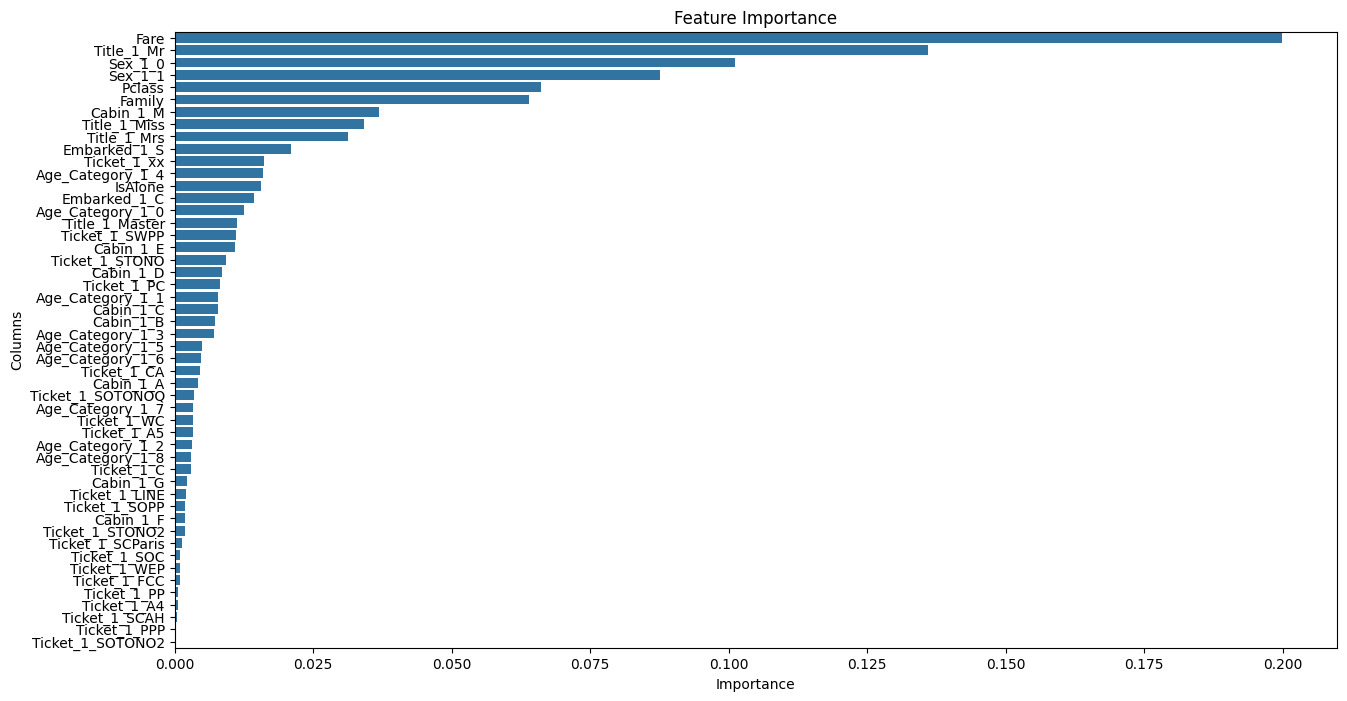

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the columns by importance
best_columns_sorted = best_columns.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(15, 8))
sns.barplot(x='Importance', y='Columns', data=best_columns_sorted)

plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Columns')

# Show the graph
plt.show()

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
RF = RandomForestClassifier(n_estimators=100, random_state=123)

In [86]:
RF.fit(x_val_train, y_val_train)

RandomForestClassifier(random_state=123)

In [87]:
parametrosRF = {'n_estimators' : (10, 30, 50, 70, 90, 100),
                'criterion' : ('gini', 'entropy'),
                'max_depth' : (3,5,7,9,10),
                'max_features' : ('auto', 'sqrt'),
                'min_samples_split' : (2,4,6)}

In [88]:
RF_grid = GridSearchCV(RandomForestClassifier(n_jobs = -1, oob_score = False), param_grid = parametrosRF, cv=3, verbose = True)

In [89]:
# RF_grid.fit(x_val_train, y_val_train)

In [90]:
# best_paramsRF = RF_grid.best_estimator_
# print("Mejores parámetros encontrados:", best_paramsRF)

In [91]:
# RFG = RandomForestClassifier(max_depth=9, max_features = 'sqrt', min_samples_split=6, n_estimators=90, n_jobs=-1)

In [92]:
# RFG.fit(x_train, y_train)

In [93]:
# predictRFG = RFG.predict(x_test)

In [94]:
# prediccionesRFG = RFG.predict(x_test)

# print(classification_report(y_test, prediccionesRFG))

In [95]:
# accRFG = accuracy_score(y_test, prediccionesRFG)
# accRFG

# Using Mutual Information

In [96]:
from sklearn.feature_selection import mutual_info_classif

In [97]:
# Make sure your data is in numerical format.
X = x.select_dtypes(include=['int64', 'float64', 'uint8'])  # Filter numeric variables

# Calculate mutual information
mi = mutual_info_classif(x, y, random_state=123)

# Create a DataFrame to visualise the results
mi_df = pd.DataFrame({'Variable': X.columns, 'Mutual Information': mi})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

print(mi_df)

            Variable  Información Mutua
49           Sex_1_1           0.172963
48           Sex_1_0           0.142228
13        Title_1_Mr           0.138300
10              Fare           0.134113
14       Title_1_Mrs           0.063729
0             Pclass           0.060867
11            Family           0.048386
16      Title_1_Miss           0.035379
1   Age_Category_1_0           0.031031
33       Ticket_1_PC           0.028381
12           IsAlone           0.026005
6   Age_Category_1_5           0.024547
28       Ticket_1_A5           0.023257
26         Cabin_1_M           0.022382
5   Age_Category_1_4           0.019363
42    Ticket_1_STONO           0.017863
2   Age_Category_1_1           0.011841
4   Age_Category_1_3           0.011193
45       Ticket_1_WC           0.010583
30       Ticket_1_CA           0.009179
46      Ticket_1_WEP           0.008891
20         Cabin_1_B           0.006843
17      Embarked_1_C           0.005779
23         Cabin_1_E           0.005031


Delete the Ticket variables as they seem to offer little or no information

In [98]:
x2 = df[['Pclass', 'Fare',
       'Family', 'IsAlone', 'Age_Category_1',
       'Title_1_Master', 'Title_1_Miss', 'Title_1_Mr', 'Title_1_Mrs',
       'Embarked_1_C', 'Embarked_1_S', 'Cabin_1_A', 'Cabin_1_B', 'Cabin_1_C',
       'Cabin_1_D', 'Cabin_1_E', 'Cabin_1_F', 'Cabin_1_G', 'Cabin_1_M',
        'Sex_1_0', 'Sex_1_1', 'Age_Category_1_0',
       'Age_Category_1_1', 'Age_Category_1_2', 'Age_Category_1_3',
       'Age_Category_1_4', 'Age_Category_1_5', 'Age_Category_1_6',
       'Age_Category_1_7', 'Age_Category_1_8']]

y2 = df['Survived']

In [99]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=123)

In [100]:
x2_val_train, x2_val_test, y2_val_train, y2_val_test = train_test_split(x2_train, y2_train, test_size=0.2, random_state=123)

In [102]:
n_estimators3 = range(48, 51)
max_depth3 = range(48, 51)
var_min_samples_split3 = [2,3,4,5,6,7,8,9,10]  # Número mínimo de muestras para dividir un nodo
var_min_samples_leaf3 = [3,4]  # Número mínimo de muestras en una hoja

results3 = []

for i in n_estimators3:
    for j in max_depth3:
      for k in var_min_samples_split3:
        for l in var_min_samples_leaf3:
          RF7 = RandomForestClassifier(n_estimators=i, max_depth=j, min_samples_split=k, min_samples_leaf=l)
          RF7.fit(x2_val_train, y2_val_train)
          predicRF7 = RF7.predict(x2_val_test)
          accRF7 = accuracy_score(y2_val_test, predicRF7)
          # print(f"Arboles: {i}, Profundidad: {j}, accuracy: {accRF}, min_samples_split: {k}, min_samples_leaf:{l}")
          # Guardar los resultados en la lista
          results3.append((i, j, k, l, accRF7))

# Ordenar los resultados por accuracy en orden descendente
sorted_results3 = sorted(results3, key=lambda x2: x2[4], reverse=True)

# Mostrar los 5 mejores resultados
for idx, (n_estimators, max_depth, min_samples_split, min_samples_leaf, acc) in enumerate(sorted_results3[:5]):
    print(f"Top {idx+1}: n_estimators: {n_estimators}, max_depth: {max_depth}, min_samples_split: {min_samples_split}, min_samples_leaf: {min_samples_leaf}, Accuracy: {acc}")

Top 1: n_estimators: 50, max_depth: 48, min_samples_split: 7, min_samples_leaf: 4, Accuracy: 0.8881118881118881
Top 2: n_estimators: 48, max_depth: 49, min_samples_split: 3, min_samples_leaf: 4, Accuracy: 0.8811188811188811
Top 3: n_estimators: 49, max_depth: 50, min_samples_split: 5, min_samples_leaf: 4, Accuracy: 0.8811188811188811
Top 4: n_estimators: 48, max_depth: 48, min_samples_split: 2, min_samples_leaf: 4, Accuracy: 0.8741258741258742
Top 5: n_estimators: 48, max_depth: 48, min_samples_split: 8, min_samples_leaf: 4, Accuracy: 0.8741258741258742


In [107]:
RFOff8 = RandomForestClassifier(n_estimators=50, max_depth = 48, min_samples_split=7, min_samples_leaf=4)
RFOff8.fit(x2_train, y2_train)
predicRFOff8 = RFOff8.predict(x2_test)
accRFOff8 = accuracy_score(y2_test, predicRFOff8)
accRFOff8

0.8715083798882681